This notebook is an example of coregulated genes search. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
genes_1 = pd.read_csv("data_set_ALL_AML_train.csv")
genes_2 = pd.read_csv("data_set_ALL_AML_independent.csv")
labels = pd.read_csv("actual.csv")

Cleaning the data:

In [3]:
expr_1 = [col for col in genes_1.columns if "call" not in col]
expr_2 = [col for col in genes_2.columns if "call" not in col]

In [4]:
genes_1 = genes_1[expr_1]
genes_2 = genes_2[expr_2]

In [5]:
genes_1.index = pd.to_numeric(genes_1.index)
genes_2.index = pd.to_numeric(genes_2.index)
genes_1.sort_index(inplace=True)
genes_2.sort_index(inplace=True)

'names' will be the container with genes' names to refer when needed

In [6]:
names = genes_1["Gene Description"]

In [7]:
names

0                     AFFX-BioB-5_at (endogenous control)
1                     AFFX-BioB-M_at (endogenous control)
2                     AFFX-BioB-3_at (endogenous control)
3                     AFFX-BioC-5_at (endogenous control)
4                     AFFX-BioC-3_at (endogenous control)
5                    AFFX-BioDn-5_at (endogenous control)
6                    AFFX-BioDn-3_at (endogenous control)
7                     AFFX-CreX-5_at (endogenous control)
8                     AFFX-CreX-3_at (endogenous control)
9                     AFFX-BioB-5_st (endogenous control)
10                    AFFX-BioB-M_st (endogenous control)
11                    AFFX-BioB-3_st (endogenous control)
12                    AFFX-BioC-5_st (endogenous control)
13                    AFFX-BioC-3_st (endogenous control)
14                   AFFX-BioDn-5_st (endogenous control)
15                   AFFX-BioDn-3_st (endogenous control)
16                    AFFX-CreX-5_st (endogenous control)
17            

In [8]:
genes_1 = genes_1.drop(["Gene Description", "Gene Accession Number"], axis=1)
genes_2 = genes_2.drop(["Gene Description", "Gene Accession Number"], axis=1)


In [9]:
genes_1 = genes_1.T
genes_2 = genes_2.T

In [10]:
genes = genes_1.append(genes_2, ignore_index=True)


In [11]:
genes.index = pd.to_numeric(genes.index)
genes.sort_index(inplace=True)

Labelling type of cancer:

In [12]:
genes.index = labels["cancer"]

calculating genes' variance across samples:

In [13]:
genes_var = genes.var()

In [14]:
genes_var.head()

0     9552.781690
1     9242.251761
2    15054.797926
3    12518.032668
4    14928.834898
dtype: float64

In [15]:
len(genes_var)

7129

In [16]:
genes_var.tail()

7124    203626.475743
7125     42642.306729
7126      2013.741588
7127    389274.225156
7128      1615.431729
dtype: float64

In [17]:
genes_var.sort_values(inplace=True, ascending=False)

In [18]:
genes_var.head()

5709    2.526051e+08
5710    1.217362e+08
18      1.184315e+08
5506    1.098853e+08
1867    1.008080e+08
dtype: float64

In [19]:
genes_var.tail()

5223    943.294992
5197    873.886541
6392    833.459898
96      812.513302
1243    713.056142
dtype: float64

In [20]:
genes_var[5709]

252605135.82140067

In [21]:
genes_var[1243]

713.05614241001558

In [22]:
len(genes_var)

7129

now we have least variance in the end of genes_var obj:

In [23]:
genes_var.iloc[7120:]

4415    1000.420775
5419     986.422535
5528     983.358372
3678     957.971831
5223     943.294992
5197     873.886541
6392     833.459898
96       812.513302
1243     713.056142
dtype: float64

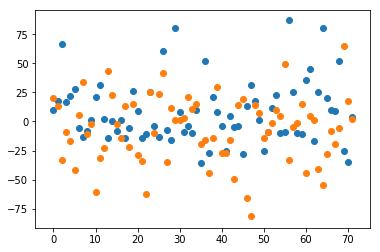

In [24]:
plt.scatter(range(72), genes[1243])
plt.scatter(range(72), genes[96])

And we have the greatest variance values at the beginning of the genes_var obj:

In [25]:
genes_var.iloc[:5]

5709    2.526051e+08
5710    1.217362e+08
18      1.184315e+08
5506    1.098853e+08
1867    1.008080e+08
dtype: float64

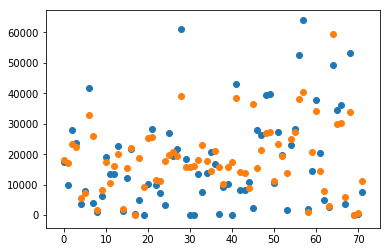

In [26]:
plt.scatter(range(72), genes[5709])
plt.scatter(range(72), genes[5710])

In [27]:
ref_indices = genes_var.index.tolist()

In [28]:
ref_indices[:10]

[5709, 5710, 18, 5506, 1867, 5647, 5228, 1221, 6223, 4016]

In [29]:
indices = ref_indices[:]

In [30]:
len(ref_indices)

7129

This loop is a kind of "brute-force attack" but still it's here just to get some insights what we can do with the data. So, let's take first one hundred most variable genes

In [31]:
corr_res = []
entry = ()
tried_combs = []

for el in ref_indices[:100]:
    for elem in indices[:100]:
        if el == elem:
            continue
        elif (el, elem) in tried_combs or (elem, el) in tried_combs:
            continue
        else:
            corr = genes[el].corr(genes[elem])
            names_vs = str(names[el]) + " vs " + str(names[elem])
            entry = (names_vs, (el, elem), corr)
            corr_res.append(entry)
            entry = ()
            tried_combs.append((el,elem))

            
            
# may be you can improve this cumbersome loop later

In [34]:
len(corr_res)

4950

In [35]:
from operator import itemgetter

In [36]:
corr_sorted = sorted(corr_res, reverse=True, key=itemgetter(2))

now we have the list with items containing the following information:
(genes' names joined with "vs", (gene 1 number, gene 2 number), correlation coefficient)
We now can use genes' numbers to access columns in 'genes' dataframe and plot the data.
The pattern is: corr_sorted [item index] ['tuple of genes' index] [gene index] 


Here are the genes with strong positive correlation:

In [37]:
for counter, value in enumerate(corr_sorted[:10]):
    print(counter, "--->", value)

0 ---> ('Lysozyme gene (EC 3.2.1.17) vs LYZ Lysozyme', (6805, 6802), 0.98900954061091884)
1 ---> ('ELA2 Elastatse 2; neutrophil vs GB DEF = Neutrophil elastase gene; exon 5', (6217, 6218), 0.98811860399621732)
2 ---> ('INTERLEUKIN-8 PRECURSOR vs Interleukin 8 (IL8) gene', (6200, 6199), 0.95666328569531067)
3 ---> ('hum_alu_at (miscellaneous control) vs EEF1A1 Translation elongation factor 1-alpha-1', (18, 5057), 0.95609355575077581)
4 ---> ('hum_alu_at (miscellaneous control) vs EEF1A1 Translation elongation factor 1-alpha-1', (18, 5996), 0.95281639381244909)
5 ---> ('GB DEF = Neutrophil elastase gene; exon 5 vs PRTN3 Proteinase 3 (serine proteinase; neutrophil; Wegener granulomatosis autoantigen)', (6218, 4278), 0.95046771487338544)
6 ---> ('Globin; Beta vs Alpha-globin 1 gene extracted from Human DNA sequence from cosmid GG1 from a contig from the tip of the short arm of chromosome 16; spanning 2Mb of 16p13.3 Contains alpha and zeta globin genes and ESTs', (5710, 5228), 0.94609918083

Although one should be very careful when analyzing the correlation, as many associated genes are nearly the same. As here below:

genes:  Lysozyme gene (EC 3.2.1.17) vs LYZ Lysozyme
correlation coefficien:  0.989009540611


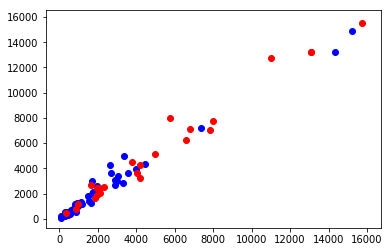

In [38]:
plt.scatter(genes.loc["ALL", corr_sorted[0][1][0]], genes.loc["ALL", corr_sorted[0][1][1]],
           c="blue", label="ALL")
plt.scatter(genes.loc["AML", corr_sorted[0][1][0]], genes.loc["AML", corr_sorted[0][1][1]],
           c="red", label="AML")

print("genes: ", corr_sorted[0][0])
print("correlation coefficien: ", corr_sorted[0][2])

In [39]:
for counter, value in enumerate(corr_sorted[10:40], start=10):
    print(counter, "--->",  value)

10 ---> ('EEF1A1 Translation elongation factor 1-alpha-1 vs EEF1A1 Translation elongation factor 1-alpha-1', (5996, 5057), 0.9342353008576556)
11 ---> ('EEF1A1 Translation elongation factor 1-alpha-1 vs 60S RIBOSOMAL PROTEIN L18A', (5057, 4651), 0.93207040816571674)
12 ---> ('EEF1A1 Translation elongation factor 1-alpha-1 vs 60S RIBOSOMAL PROTEIN L18A', (5996, 4651), 0.92852441784344086)
13 ---> ('RPL37A Ribosomal protein L37a vs EEF1A1 Translation elongation factor 1-alpha-1', (1221, 5996), 0.92527061898075758)
14 ---> ('hum_alu_at (miscellaneous control) vs RPL37A Ribosomal protein L37a', (18, 1221), 0.92226170568500498)
15 ---> ('AFFX-HSAC07/X00351_M_at (endogenous control) vs AFFX-HSAC07/X00351_5_at (endogenous control)', (45, 44), 0.91929880289892763)
16 ---> ('HLA-DRB1 Major histocompatibility complex; class II; DR beta 5 vs Major Histocompatibility Complex; Class Ii Beta W52', (7069, 6788), 0.91798326405712927)
17 ---> ('AFFX-HSAC07/X00351_3_at (endogenous control) vs ACTB Actin

genes:  EEF1A1 Translation elongation factor 1-alpha-1 vs 60S RIBOSOMAL PROTEIN L18A
correlation coefficien:  0.928524417843


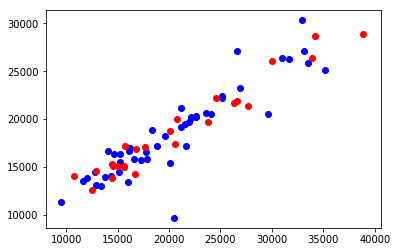

In [40]:
plt.scatter(genes.loc["ALL", corr_sorted[12][1][0]], genes.loc["ALL", corr_sorted[12][1][1]],
           c="blue", label="ALL")
plt.scatter(genes.loc["AML", corr_sorted[12][1][0]], genes.loc["AML", corr_sorted[12][1][1]],
           c="red", label="AML")

print("genes: ", corr_sorted[12][0])
print("correlation coefficien: ", corr_sorted[12][2])

genes:  HLA-DRB1 Major histocompatibility complex; class II; DR beta 5 vs Major Histocompatibility Complex; Class Ii Beta W52
correlation coefficien:  0.917983264057


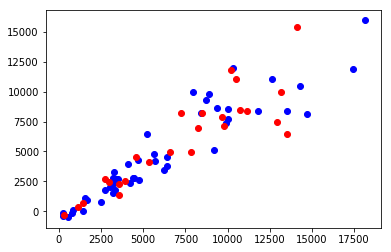

In [41]:
plt.scatter(genes.loc["ALL", corr_sorted[16][1][0]], genes.loc["ALL", corr_sorted[16][1][1]],
           c="blue", label="ALL")
plt.scatter(genes.loc["AML", corr_sorted[16][1][0]], genes.loc["AML", corr_sorted[16][1][1]],
           c="red", label="AML")

print("genes: ", corr_sorted[16][0])
print("correlation coefficien: ", corr_sorted[16][2])

genes:  PROBABLE PROTEIN DISULFIDE ISOMERASE ER-60 PRECURSOR vs HLA-DRB1 Major histocompatibility complex; class II; DR beta 5
correlation coefficien:  0.823050100854


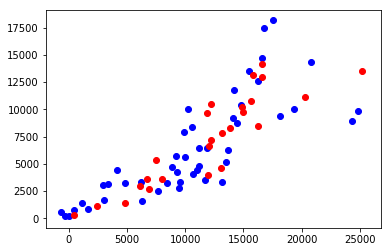

In [42]:
plt.scatter(genes.loc["ALL", corr_sorted[28][1][0]], genes.loc["ALL", corr_sorted[28][1][1]],
           c="blue", label="ALL")
plt.scatter(genes.loc["AML", corr_sorted[28][1][0]], genes.loc["AML", corr_sorted[28][1][1]],
           c="red", label="AML")

print("genes: ", corr_sorted[28][0])
print("correlation coefficien: ", corr_sorted[28][2])

Some genes with negative correlation:

In [43]:
for counter, value in enumerate(corr_sorted[4940:], start=4940):
    print(counter, "--->", value)

4940 ---> ('EEF1A1 Translation elongation factor 1-alpha-1 vs GB DEF = Polyadenylate binding protein II', (5996, 6612), -0.58618009887884004)
4941 ---> ('EEF1A1 Translation elongation factor 1-alpha-1 vs Ribosomal Protein L5', (5996, 995), -0.59230221163939634)
4942 ---> ('Sry-Related Hmg-Box 12 Protein (Gb:X73039) vs GB DEF = Polyadenylate binding protein II', (6776, 6612), -0.59519380332081961)
4943 ---> ('Ribosomal Protein L5 vs BETA-2-MICROGLOBULIN PRECURSOR', (995, 6730), -0.59852146904692516)
4944 ---> ('GB DEF = Mitochondrial 16S rRNA gene (partial) vs Ribosomal Protein L5', (5198, 995), -0.59863203662719866)
4945 ---> ('60S RIBOSOMAL PROTEIN L18A vs Tumor-associated 120 kDa nuclear protein p120; partial cds(carboxyl terminus)', (4651, 5561), -0.60050589100359031)
4946 ---> ('BETA-2-MICROGLOBULIN PRECURSOR vs RPL37 Ribosomal protein L37', (6730, 1549), -0.60166253002696546)
4947 ---> ('60S RIBOSOMAL PROTEIN L18A vs Ribosomal Protein L5', (4651, 995), -0.6034751562109979)
4948 --

genes:  EEF1A1 Translation elongation factor 1-alpha-1 vs Ribosomal Protein L5
correlation coefficien:  -0.610095846477


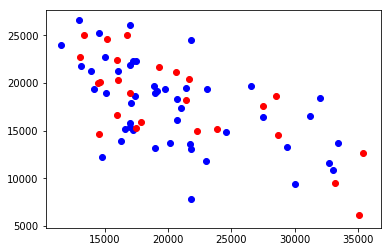

In [44]:
plt.scatter(genes.loc["ALL", corr_sorted[4949][1][0]], genes.loc["ALL", corr_sorted[4949][1][1]],
           c="blue", label="ALL")
plt.scatter(genes.loc["AML", corr_sorted[4949][1][0]], genes.loc["AML", corr_sorted[4949][1][1]],
           c="red", label="AML")

print("genes: ", corr_sorted[4949][0])
print("correlation coefficien: ", corr_sorted[4949][2])

genes:  BETA-2-MICROGLOBULIN PRECURSOR vs RPL37 Ribosomal protein L37
correlation coefficien:  -0.601662530027


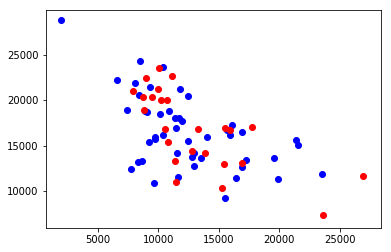

In [45]:
plt.scatter(genes.loc["ALL", corr_sorted[4946][1][0]], genes.loc["ALL", corr_sorted[4946][1][1]],
           c="blue", label="ALL")
plt.scatter(genes.loc["AML", corr_sorted[4946][1][0]], genes.loc["AML", corr_sorted[4946][1][1]],
           c="red", label="AML")

print("genes: ", corr_sorted[4946][0])
print("correlation coefficien: ", corr_sorted[4946][2])

I believe, using this rather awkward pattern one may try to find out whether some genes are up or down coregulated. But the search for correlation is dependent on the aim of the research and its context.
We may want:
1. genes coregulated with some specific gene under study
2. or we may be curious about coregulation of some specific gene pair
3. coregulation of the immune system genes 
4. genes associated with ribosomes and transcription factors
5. or whatever...
